In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
import numpy as np
import tensorflow as tf
physical_devices= tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(physical_devices[1], 'GPU')
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

In [4]:
with open('dataset_X_y_sliding_window.npy', 'rb') as f:
    lista_datos = np.load(f, allow_pickle=True)

X_train = lista_datos[0]
X_valid = lista_datos[1]
X_test = lista_datos[2]
y_train = lista_datos[3]
y_valid = lista_datos[4]
y_test = lista_datos[5]


In [5]:
print(y_valid[100:200])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_valid = encoder.transform(y_valid)
y_test = encoder.transform(y_test)

In [7]:
print(y_valid[100:200])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
X_train.shape

(22652, 64, 62)

In [68]:
inputs = tf.keras.Input(shape=(X_train.shape[1],X_train.shape[2]))

gru = tf.keras.layers.GRU(16, return_sequences=True)(inputs)
dropout = tf.keras.layers.Dropout(0.7)(gru)
flatten = tf.keras.layers.Flatten()(dropout)
outputs = tf.keras.layers.Dense(4, activation='softmax')(flatten)

rnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(rnn_model.summary())

rnn_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
optimizer=Adam(0.001),
metrics=["accuracy"])

Model: "functional_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 64, 62)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64, 16)         │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 64, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,940 (31.02 KB)

 Trainable params: 7,940 (31.02 KB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
input_shape = X_train.shape[1:]
opt = Adam(0.0001)
rnn_model = Sequential()
drp=0.7

rnn_model.add(Input(shape=input_shape))
rnn_model.add(BatchNormalization())
rnn_model.add(LSTM((32), return_sequences=True))
rnn_model.add(Dropout(drp))
rnn_model.add(LSTM((64)))
rnn_model.add(Dropout(drp))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(4, activation='softmax'))
rnn_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
optimizer=opt,
metrics=["accuracy"])
rnn_model.summary()

I0000 00:00:1747589847.728787   20313 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10534 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 64, 62)         │           248 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64, 32)         │        12,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,660 (162.73 KB)

 Trainable params: 41,536 (162.25 KB)

 Non-trainable params: 124 (496.00 B)

In [10]:
model_checkpoint_callback = EarlyStopping(monitor='val_accuracy', mode='max', patience = 10, verbose = 1, min_delta=0.01)
history = rnn_model.fit(X_train, y_train, batch_size=32,epochs=1000, callbacks=[model_checkpoint_callback], validation_data=(X_valid, y_valid))
res = rnn_model.predict(X_test)
print(model_checkpoint_callback.best)
y_pred = np.argmax(res, axis = 1)

Epoch 1/1000


I0000 00:00:1747589862.853040   24897 cuda_dnn.cc:529] Loaded cuDNN version 90300


708/708 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2703 - loss: 1.3991 - val_accuracy: 0.3914 - val_loss: 1.3566
Epoch 2/1000
708/708 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3017 - loss: 1.3752 - val_accuracy: 0.3564 - val_loss: 1.3482
Epoch 3/1000
708/708 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3350 - loss: 1.3498 - val_accuracy: 0.3052 - val_loss: 1.3755
Epoch 4/1000
708/708 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3927 - loss: 1.2956 - val_accuracy: 0.2633 - val_loss: 1.4342
Epoch 5/1000
708/708 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4221 - loss: 1.2509 - val_accuracy: 0.3491 - val_loss: 1.3643
Epoch 6/1000
708/708 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4419 - loss: 1.2129 - val_accuracy: 0.3617 - val_loss: 1.4270
Epoch 7/1000
708/708 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4603 - loss: 1.1812 - val_accuracy: 0.4071 - val_loss: 1.3454
Epoch 8/1000
708/708 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4712 - loss: 1.1542 - val_accuracy

In [41]:
from tensorflow.keras.layers import Conv1D

X_train_cnn = X_train.reshape(864000, 32, 1)
X_valid_cnn = X_test.reshape(288000, 32, 1)
X_train_cnn = X_test.reshape(288000, 32, 1)

opt = Adam(0.001)
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(32, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(3, activation='softmax'))
model_cnn.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
optimizer=opt,
metrics=["accuracy"])
model_cnn.summary()

ValueError: cannot reshape array of size 112387400 into shape (864000,32,1)

In [ ]:
model_checkpoint_callback = EarlyStopping(monitor='val_accuracy', mode='max', patience = 10, verbose = 1, min_delta=0.01)
history = model_cnn.fit(X_train, y_train, batch_size=32,epochs=1000, callbacks=[model_checkpoint_callback], validation_data=(X_valid, y_valid))
res = model_cnn.predict(X_test)
print(model_checkpoint_callback.best)
y_pred = np.argmax(res, axis = 1)

Epoch 1/1000
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - accuracy: 0.3435 - loss: 1.2075 - val_accuracy: 0.3336 - val_loss: 1.0988
Epoch 2/1000
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - accuracy: 0.3419 - loss: 1.0941 - val_accuracy: 0.3322 - val_loss: 1.1048
Epoch 3/1000
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 87s 3ms/step - accuracy: 0.3463 - loss: 1.0924 - val_accuracy: 0.3353 - val_loss: 1.1038
Epoch 4/1000
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - accuracy: 0.3448 - loss: 1.0920 - val_accuracy: 0.3346 - val_loss: 1.1139
Epoch 5/1000
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step - accuracy: 0.3462 - loss: 1.0913 - val_accuracy: 0.3343 - val_loss: 1.1166
Epoch 6/1000
27000/27000 ━━━━━━━━━━━━━━━━━━━━ 143s 3ms/step - accuracy: 0.3446 - loss: 1.0911 - val_accuracy: 0.3364 - val_loss: 1.1164
Epoch 7/1000
18558/27000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.3483 - loss: 1.0888

KeyboardInterrupt: 

In [11]:
p = confusion_matrix(y_test, y_pred, labels=[0,1])

# list all data in history
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


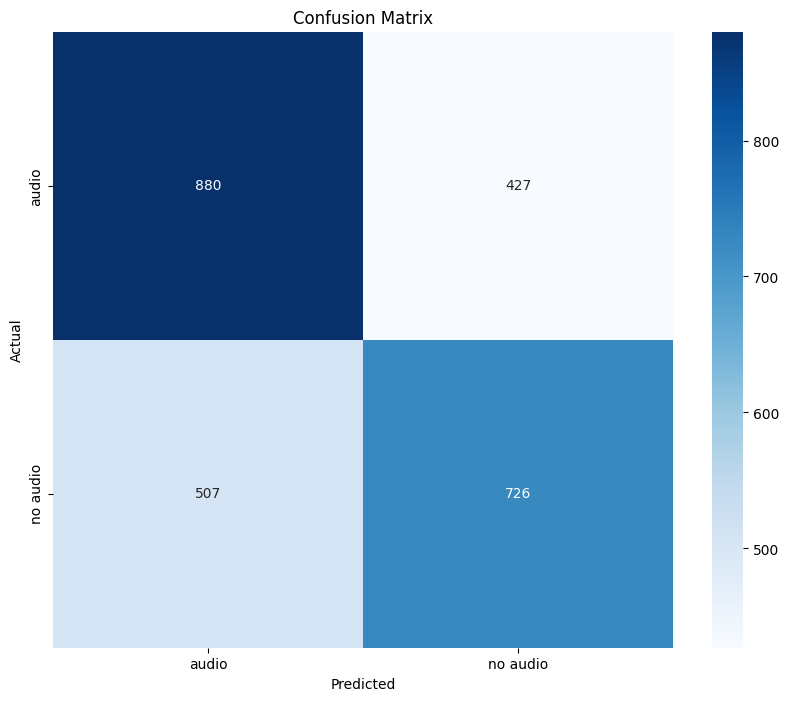

In [12]:
# prompt: print confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(p, annot=True, fmt="d", cmap="Blues", xticklabels=['audio', 'no audio'], yticklabels=['audio', 'no audio'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Text(0.5, 1.0, 'Loss')

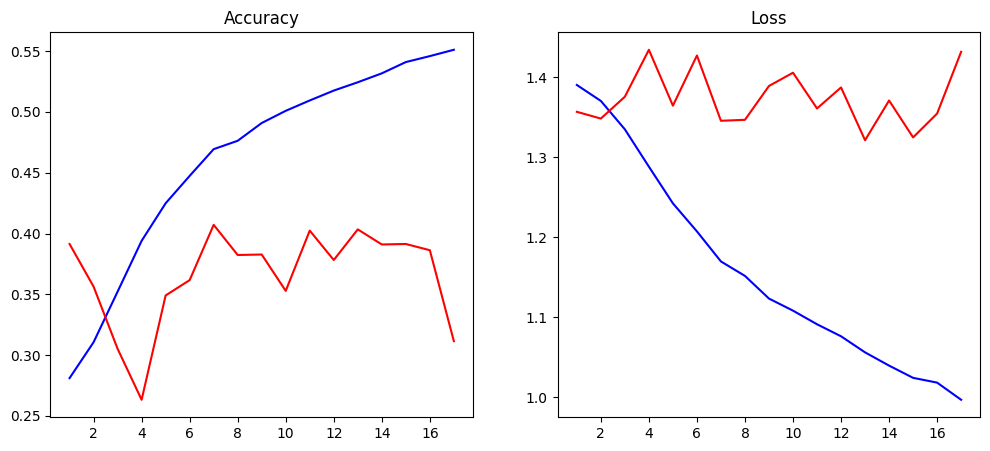

In [13]:
acc = history.history["accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

x = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, "b", label="traning_acc")
plt.plot(x, val_accuracy, "r", label="traning_acc")
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(x, loss, "b", label="traning_acc")
plt.plot(x, val_loss, "r", label="traning_acc")
plt.title("Loss")